## Get Required Files from Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Set your project path 
project_path = "/content/drive/My Drive /Colab Notebooks/capstone/Input Data Synthetic (created but not used in our project) (1).xlsx" ## Add your path here ##

In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/capstone")
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/capstone


In [0]:
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/capstone


#**## Reading and Exploring Data**

In [0]:
import pandas as pd


df = pd.read_excel (r'Input Data Synthetic (created but not used in our project) (1).xlsx')



In [0]:
df.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [0]:
data_sub = df.drop(labels= 'Caller' , axis=1)

In [0]:
data_sub.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 3 columns]

In [0]:
data_sub.describe()

Short description Description Assignment group
count               8492        8499             8500
unique              7481        7817               74
top       password reset         the            GRP_0
freq                  38          56             3976

In [0]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 
import re

In [0]:
GRP_n = list(set(data_sub['Assignment group']))

In [0]:


def wcloud(data1,save_file):
  comment_words = ' '
  for val in data1: 
     # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = re.split('\n|\r|_|: | ',val)
    #Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
      comment_words = comment_words + words + ' '
  
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show() 
  wordcloud.to_file(save_file)

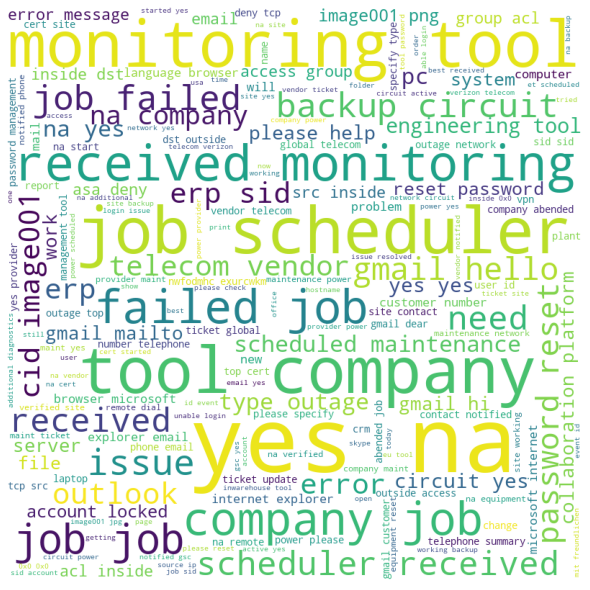

In [0]:
data1 = data_sub['Description']
stopwords = set(STOPWORDS)
save_file = "Descr_first_review.png"
wcloud(data1,save_file)



In [0]:
df_group = df.groupby("Assignment group")

In [0]:
df_group.describe()

Short description         ...             Caller     
                             count unique  ...                top freq
Assignment group                           ...                        
GRP_0                         3969   3201  ...  fumkcsji sarmtlhy  132
GRP_1                           31     31  ...  bpctwhsn kzqsbmtp    6
GRP_10                         140    138  ...  bpctwhsn kzqsbmtp   60
GRP_11                          30     30  ...  ctvaejbo mjcerqwo    7
GRP_12                         257    252  ...  oldrctiu bxurpsyi   13
...                            ...    ...  ...                ...  ...
GRP_71                           2      2  ...  rdfjsawg zpmxgdcw    2
GRP_72                           2      2  ...  ydigzqbu xdgjizek    1
GRP_73                           1      1  ...  kcnosyae zlpmfxgs    1
GRP_8                          661    634  ...  bpctwhsn kzqsbmtp  362
GRP_9                          252    237  ...  bpctwhsn kzqsbmtp  153

[74 rows x 12 columns]

In [0]:
print(data_sub['Assignment group'].value_counts())

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_67       1
GRP_35       1
GRP_64       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64


In [0]:
len(data_sub[data_sub["Assignment group"]=="GRP_0"])


3976

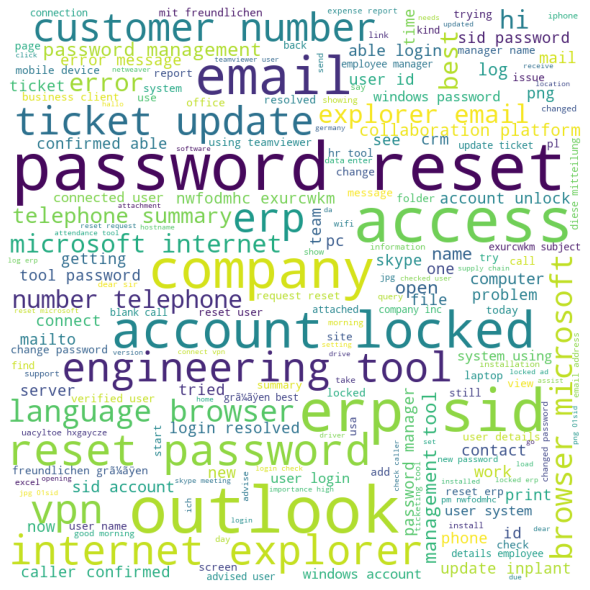

In [0]:
data1 = data_sub[data_sub["Assignment group"]=="GRP_0"].Description
stopwords = set(STOPWORDS)
stopwords.update(["will", "please", "help", "working", "issue", "hello", "issue", "need", "kindly", "unable","received", "gmail","cid","image001"])
save_file = "grp0_descr_updated_stwords.png"
wcloud(data1 , save_file)


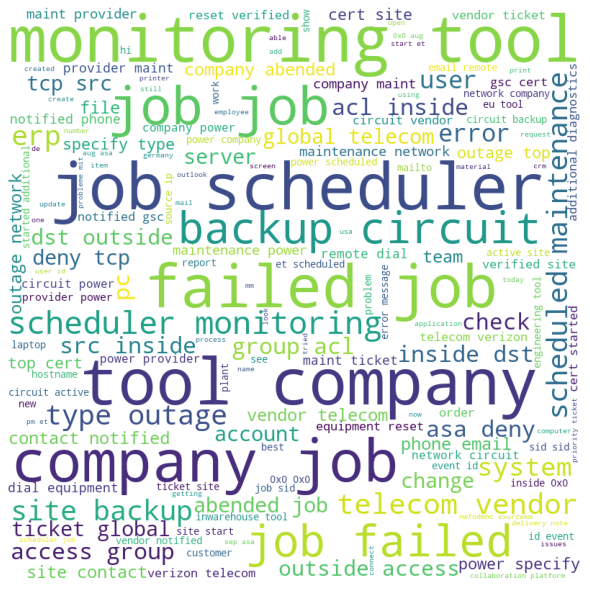

In [0]:
data1 = data_sub[data_sub["Assignment group"]!="GRP_0"].Description
comment_words = ' '
stopwords = set(STOPWORDS)
stopwords.update(["will", "please", "help", "working", "issue","received", "hello", "issue", "need", "kindly", "unable","yes","na","gmail","cid","image001"])
save_file = "descr_expGRP0_updated_stwords.png"
wcloud(data1 , save_file)

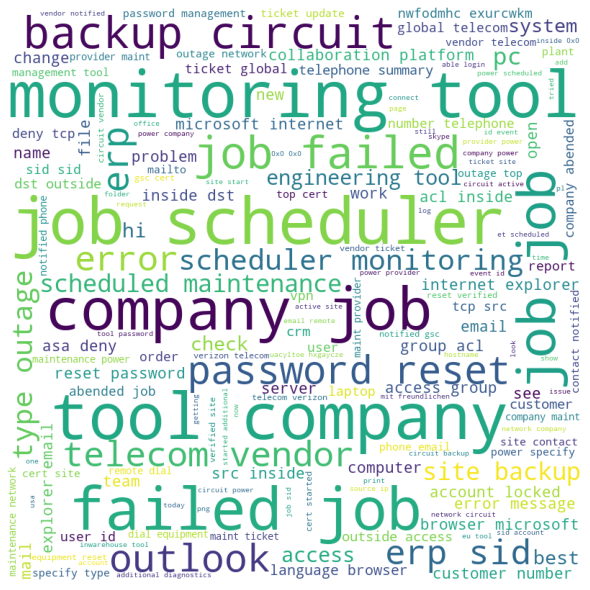

In [0]:
data1 = data_sub.Description
stopwords = set(STOPWORDS)
stopwords.update(["will", "please", "help", "working", "issue","received", "hello", "issue", "need", "kindly", "unable","yes","na","gmail","cid","image001"])
save_file = "descr_updated_stwords.png"
wcloud(data1 , save_file)

In [0]:
data_sub = data_sub.dropna()

In [0]:
data_sub = data_sub.reset_index(drop=True)

In [0]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
stopwords = set(STOPWORDS)
stopwords.update(["will", "please", "help", "received", "hello", "regards", "need", "kindly", "unable","yes","gmail","cid","image001","com"])

def clean_data(my_str):
  my_str = my_str.lower()
  my_str = remove_punc(my_str)
  my_str = my_str.strip()
  my_str = " ".join(w for w in nltk.wordpunct_tokenize(my_str) if w in words or not w.isalpha())
  my_str = " ".join(w for w in nltk.wordpunct_tokenize(my_str) if not w in stopwords)
  return(my_str)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [0]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punc(my_str):
  no_punct = ""
  for char in my_str:
    if char not in punctuations:
       no_punct = no_punct + char
  return (no_punct)



In [0]:

for i in range(len(data_sub)):
  data_sub['Description'][i] = clean_data(data_sub['Description'][i])
  data_sub['Short description'][i] = clean_data(data_sub['Short description'][i])
  Srt_des_i = data_sub['Short description'][i].split()
  Desc_i = data_sub['Description'][i].split()
  if len(Desc_i) < len(Srt_des_i):
    data_sub['Description'][i] = data_sub['Short description'][i]


In [0]:
data_sub.head()

Short description  ... Assignment group
0       login issue  ...            GRP_0
1           outlook  ...            GRP_0
2          cant log  ...            GRP_0
3       access page  ...            GRP_0
4             error  ...            GRP_0

[5 rows x 3 columns]

In [0]:
for index in range(len(data_sub)):
  grpname = data_sub.iloc[index,2]
  if len(data_sub[data_sub['Assignment group'] == grpname]) < 6:
    data_sub.iloc[index,2] = "GRP_com"
    

In [0]:
data_sub['Assignment group'].value_counts()

GRP_0      3968
GRP_8       661
GRP_24      289
GRP_12      257
GRP_9       252
GRP_2       241
GRP_19      215
GRP_3       200
GRP_6       184
GRP_13      145
GRP_10      140
GRP_5       129
GRP_14      118
GRP_25      116
GRP_33      107
GRP_4       100
GRP_29       97
GRP_18       88
GRP_16       85
GRP_17       81
GRP_31       69
GRP_7        68
GRP_34       61
GRP_26       56
GRP_40       45
GRP_28       44
GRP_com      44
GRP_41       40
GRP_15       39
GRP_30       39
GRP_42       37
GRP_20       36
GRP_45       35
GRP_22       31
GRP_1        31
GRP_11       30
GRP_21       29
GRP_47       27
GRP_23       25
GRP_48       25
GRP_62       25
GRP_60       20
GRP_39       19
GRP_27       18
GRP_37       16
GRP_44       15
GRP_36       15
GRP_50       14
GRP_65       11
GRP_53       11
GRP_52        9
GRP_51        8
GRP_55        8
GRP_46        6
GRP_59        6
GRP_49        6
Name: Assignment group, dtype: int64

In [0]:
GRP_n = list(set(data_sub['Assignment group']))
print(len(GRP_n))

56


In [0]:
data_sub = data_sub.reset_index(drop=True)

In [0]:
data_name = ' '.join(df.Caller)
token = data_name.split()
out_token = list(set(token))
stopwords = set(STOPWORDS)
stopwords.update(["will", "please", "help", "working", "issue","received", "hello", "issue", "need", "kindly", "unable","yes","na","gmail","cid","image001"])
stopwords.update(out_token)
for grpname in GRP_n:
  data1 = data_sub[data_sub['Assignment group'] == grpname].Description
  save_file = str(grpname) + "_descr_wcloud.png"
  wcloud(data1,save_file)
 


In [0]:
import nltk
nltk.download('punkt')
len_data_sub = []
len_data_sub = [0 for x in range(len(data_sub))]
for index in range(len(data_sub)):
  text = nltk.word_tokenize(data_sub.Description[index])
  len_data_sub[index] = len(text)


print(max(len_data_sub))

maxlen = max(len_data_sub)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
1355


In [0]:
data_desc = ' '.join(data_sub.Description)
text = nltk.word_tokenize(data_desc)
out_token = list(set(text))
print(out_token)
print(len(out_token))
vocab_size = len(out_token)

['4341465171', '302815015302815015', '1029149', '259', 'spindle', 'lhqsm518fim', 'job1953a', '242', 'comprehend', 'understanding', 'cidimage002png01d22075f8d4be00', 'prt2prtqz7282', 'conclusion', 'bde21', 'cidimage001png01d2255975e00b60', 'sid38cold', '105924137445', 'cidimage001png01sid35008716912e0', '061600', '001', 'edfl8111326', 'quina', '2583868639892461', 'f110', 'outside1921680108445', 'éÿ³', 'hostname216', '373pc', 'hostname480', 'lapping', '226907395', '1510', '3331', 'floor', '0927980419', '4525350499dst', 'heï¼œ', 'wide', 'companyapindpu5lean2960sstacksw01', '5349', '4e3d', 'receiver', '6c76', 'syxjpdhlbdg9dptm', 'expect', '8172016', 'fulqgsu5utybgywr', '32181', 'inside292613309557019', '39', 'difusiã³n', 'comment', '6720004', 'grade', '924', '191848', 'pcl16', '1004', '¿˜', 'price', '2132604ft8torx', 'expiration', 'receipt', '55334tcp', '405429', 'cidimage003jpg01d22f999aa063b0', 'keehad8fvkgaalen', 'tzscsj0xhc3ruyw1', '4104', '80sjv32', '36e52bcd', '500000', '345', '509',

In [0]:
import nltk
from nltk.util import ngrams
data1 = (data_sub.Description)


bigram_out = ' '
for val in data1:   
  val = str(val) 
  n_grams = ngrams(nltk.word_tokenize(val), 2)
  for grams in n_grams: 
    bigram_out = bigram_out + str(grams) + ' '

print(bigram_out)
print(len(bigram_out))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: generator 'ngrams' raised StopIteration
  # Remove the CWD from sys.path while we load stuff.


 ('user', 'manager') ('manager', 'name') ('name', 'checked') ('checked', 'user') ('user', 'name') ('name', 'ad') ('ad', 'reset') ('reset', 'password') ('password', 'advised') ('advised', 'user') ('user', 'login') ('login', 'check') ('check', 'caller') ('caller', 'confirmed') ('confirmed', 'able') ('able', 'login') ('login', 'issue') ('issue', 'resolved') ('team', 'outlook') ('outlook', 'calendar') ('calendar', 'somebody') ('somebody', 'advise') ('advise', 'correct') ('correct', 'kind') ('hi', 'log') ('log', 'best') ('access', 'page') ('log', 'engineering') ('engineering', 'tool') ('event', 'criticalhostname221companycom') ('criticalhostname221companycom', 'value') ('value', 'threshold') ('threshold', 'oraclesid37erpdata21sr3psa1d7sr3psa1ddata7perpsr3psa1d4524') ('oraclesid37erpdata21sr3psa1d7sr3psa1ddata7perpsr3psa1d4524', '98') ('ticketno1550391', 'employment') ('employment', 'status') ('status', 'new') ('new', 'enter') ('enter', 'name') ('disable', 'add') ('add', 'outlook') ('ticket'

In [0]:
import nltk
from nltk.util import ngrams
data1 = (data_sub.Description)
trigram_out = ' '
for val in data1:   
  val = str(val) 
  n_grams = ngrams(nltk.word_tokenize(val), 3)
  for grams in n_grams: 
    trigram_out = trigram_out + str(grams) + ' '

print(trigram_out)
print(len(trigram_out))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: generator 'ngrams' raised StopIteration
  


 ('user', 'manager', 'name') ('manager', 'name', 'checked') ('name', 'checked', 'user') ('checked', 'user', 'name') ('user', 'name', 'ad') ('name', 'ad', 'reset') ('ad', 'reset', 'password') ('reset', 'password', 'advised') ('password', 'advised', 'user') ('advised', 'user', 'login') ('user', 'login', 'check') ('login', 'check', 'caller') ('check', 'caller', 'confirmed') ('caller', 'confirmed', 'able') ('confirmed', 'able', 'login') ('able', 'login', 'issue') ('login', 'issue', 'resolved') ('team', 'outlook', 'calendar') ('outlook', 'calendar', 'somebody') ('calendar', 'somebody', 'advise') ('somebody', 'advise', 'correct') ('advise', 'correct', 'kind') ('hi', 'log', 'best') ('log', 'engineering', 'tool') ('event', 'criticalhostname221companycom', 'value') ('criticalhostname221companycom', 'value', 'threshold') ('value', 'threshold', 'oraclesid37erpdata21sr3psa1d7sr3psa1ddata7perpsr3psa1d4524') ('threshold', 'oraclesid37erpdata21sr3psa1d7sr3psa1ddata7perpsr3psa1d4524', '98') ('ticketno

#**## Modelling**

## Import required modules required for modelling.

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [0]:
max_features = vocab_size
max_len = maxlen
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data_sub.Description)
X = tokenizer.texts_to_sequences(data_sub['Description'])
X = pad_sequences(X, maxlen = maxlen, padding= 'post')


y = np.asarray(data_sub['Assignment group'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y_out = le.transform(y)

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])
print(y_out[0])

Number of Samples: 8491
[ 2 50 20 ...  0  0  0]
Number of Labels:  8491
GRP_0
0


In [0]:
from sklearn.model_selection import train_test_split
data1 = data_sub[data_sub['Assignment group'] == "GRP_0"]
X_train, X_test, y_train, y_test = train_test_split(data1['Description'], data1['Assignment group'], test_size=0.2)

for grpname in GRP_n:
  data1 = data_sub[data_sub['Assignment group'] == grpname]
  X_train1, X_test1, y_train1, y_test1 = train_test_split(data1['Description'], data1['Assignment group'], test_size=0.2)
  X_train = X_train + X_train1

In [0]:
X_train

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8485    NaN
8486    NaN
8487    NaN
8488    NaN
8490    NaN
Name: Description, Length: 7413, dtype: object

# Define X and y for your model.

#**## Word Embedding**

## Get Glove Word Embeddings

# Get the Word Embeddings using Embedding file

# Create a weight matrix for words in training docs